<a href="https://colab.research.google.com/github/akshat-020/Stock-Prediction/blob/main/stock_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Installing the Libraries**

In [1]:
!pip install yahoo_fin
!pip install alpha_vantage
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.0 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 33.4 MB/s 
     |████████████████████████████████| 127 kB 55.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=1c345e5ff42b6ea0e7aa0267475b3d920b64ad5c70a4edb5aa735f887b7d22dd
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=31abbec1876beabd41e9a4fa956e5b73eaa0ab910ccb5a765f308fdb94fba77c
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=fa3d64cf974e48df64fab8573c314d4af65699862b17b7dacade9

### **Import **

In [2]:
import requests
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


### **Part 1**

In [3]:
# Import relevant packages
import yahoo_fin.stock_info as ya
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests 
import numpy as np
# Get the 100 most traded stocks for the trading day
movers = ya.get_day_most_active()
movers.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,AMC,"AMC Entertainment Holdings, Inc.",22.18,3.52,18.86,124260000.0,43184000.0,11386000000.0,NaN
1,AMD,"Advanced Micro Devices, Inc.",102.31,-1.60,-1.54,93771000.0,102888000.0,165794000000.0,37.20
2,F,Ford Motor Company,15.30,-0.07,-0.46,67488000.0,62572000.0,62790000000.0,5.41
3,WBD,"Warner Bros. Discovery, Inc.",14.59,-2.89,-16.53,67900000.0,21394000.0,35408000000.0,6.91
4,DKNG,DraftKings Inc.,17.96,1.60,9.78,57136000.0,20984000.0,7855000000.0,NaN


In [4]:
len(movers)

100

### **Part 2**

### **IBM Stock Data**

In [5]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data_IBM = pdr.get_data_yahoo("IBM", start="2008-01-01", end="2022-04-30")

[*********************100%***********************]  1 of 1 completed


In [6]:
len(data_IBM)

3608

In [7]:
data_IBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457767,9940661
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382


###**Technical Indicators**

### **RSI-INDICATOR**


In [8]:
url = 'https://www.alphavantage.co/query?function=RSI&symbol=IBM&interval=daily&time_period=14&series_type=open&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
rsi_data = r.json()

#print(rsi_data)
new_rsi= pd.DataFrame.from_dict(rsi_data['Technical Analysis: RSI'])
new1_rsi=new_rsi.transpose()
new1_rsi=new1_rsi.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
new1_rsi.head()

,RSI
2008-01-02,51.6058
2008-01-03,39.0469
2008-01-04,38.0455
2008-01-07,31.2910
2008-01-08,30.7916


### **SMA- Simple moving average**




In [9]:
url = 'https://www.alphavantage.co/query?function=SMA&symbol=IBM&interval=daily&time_period=14&series_type=open&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
sma_data = r.json()

#print(sma_data)
new_sma= pd.DataFrame.from_dict(sma_data['Technical Analysis: SMA'])
new1_sma=new_sma.transpose()
new1_sma=new1_sma.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
new1_sma.head()

,SMA
2008-01-02,65.7894
2008-01-03,65.5930
2008-01-04,65.4178
2008-01-07,65.1170
2008-01-08,64.8869


### **EMA-exponential moving average**

In [10]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=EMA&symbol=IBM&interval=daily&time_period=10&series_type=open&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
ema_data = r.json()

#print(ema_data)
#print(ema_data['Technical Analysis: EMA'])

new_ema= pd.DataFrame.from_dict(ema_data['Technical Analysis: EMA'])
new1_ema=new_ema.transpose()
new1_ema=new1_ema.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
print(new1_ema)

                 EMA
2008-01-02   66.1968
2008-01-03   65.6571
2008-01-04   65.1649
2008-01-07   64.3664
2008-01-08   63.6795
...              ...
2022-04-25  131.5984
2022-04-26  132.6377
2022-04-27  132.9097
2022-04-28  133.3245
2022-04-29  133.3549

[3608 rows x 1 columns]


### **ADX-Average Directional Moving Index**

In [11]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=ADX&symbol=IBM&interval=daily&time_period=14&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
adx_data = r.json()

#print(adx_data)
#print(adx_data['Technical Analysis: ADX'])

new_adx= pd.DataFrame.from_dict(adx_data['Technical Analysis: ADX'])
new1_adx=new_adx.transpose()
new1_adx=new1_adx.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
print(new1_adx)


                ADX
2008-01-02  17.4261
2008-01-03  18.2872
2008-01-04  20.0685
2008-01-07  22.0469
2008-01-08  24.2552
...             ...
2022-04-25  21.9355
2022-04-26  23.2305
2022-04-27  23.7500
2022-04-28  24.2323
2022-04-29  23.5034

[3608 rows x 1 columns]


### **OBV-On balance volum**

In [12]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OBV&symbol=IBM&interval=daily&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
obv_data = r.json()

#print(obv_data)
new_obv= pd.DataFrame.from_dict(obv_data['Technical Analysis: OBV'])
new1_obv=new_obv.transpose()
new1_obv=new1_obv.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
new1_obv.index.rename('Date', inplace=True)
print(new1_obv)

                       OBV
Date                      
2008-01-02   49481456.0000
2008-01-03   57356685.0000
2008-01-04   45814494.0000
2008-01-07   32582176.0000
2008-01-08   22713794.0000
...                    ...
2022-04-25  298547082.0000
2022-04-26  293659687.0000
2022-04-27  289290635.0000
2022-04-28  293767703.0000
2022-04-29  288689043.0000

[3608 rows x 1 columns]


### **Merging the stock data and indicators**

In [13]:
len(data_IBM)

3608

In [14]:
data_IBM = data_IBM.assign(RSI = list(new1_rsi['RSI']))
data_IBM = data_IBM.assign(EMA = list(new1_ema['EMA']))
data_IBM = data_IBM.assign(ADX = list(new1_adx['ADX']))
data_IBM = data_IBM.assign(OBV = list(new1_obv['OBV']))
data_IBM = data_IBM.assign(SMA = list(new1_sma['SMA']))

In [15]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,SMA
Date,,,,,,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457767,9940661,51.6058,66.1968,17.4261,49481456.0000,65.7894
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,57356685.0000,65.5930
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,45814494.0000,65.4178
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,32582176.0000,65.1170
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,64.8869
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,128.8931
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,129.5387
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,130.1032


### **Creating new Features Differential**

In [16]:
data_IBM = data_IBM.assign(Open_Close = list(-data_IBM['Close']+data_IBM.loc["2008-01-01":"2022-04-30", 'Open']))
data_IBM = data_IBM.assign(High_low = list(data_IBM['High']-data_IBM['Low']))


In [17]:
data_IBM


,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,SMA,Open_Close,High_low
Date,,,,,,,,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457767,9940661,51.6058,66.1968,17.4261,49481456.0000,65.7894,4.110893,4.608025
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,57356685.0000,65.5930,-0.066917,1.520081
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,45814494.0000,65.4178,2.695984,3.317398
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,32582176.0000,65.1170,0.191208,1.883369
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,64.8869,2.351814,3.068832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,128.8931,-1.510010,4.459991
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,129.5387,2.809998,3.699997
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,130.1032,0.720001,2.489990


In [18]:
#data_IBM.at['2008-01-03']['Close']=100.286804

In [19]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,SMA,Open_Close,High_low
Date,,,,,,,,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457767,9940661,51.6058,66.1968,17.4261,49481456.0000,65.7894,4.110893,4.608025
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,57356685.0000,65.5930,-0.066917,1.520081
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,45814494.0000,65.4178,2.695984,3.317398
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,32582176.0000,65.1170,0.191208,1.883369
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,64.8869,2.351814,3.068832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,128.8931,-1.510010,4.459991
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,129.5387,2.809998,3.699997
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,130.1032,0.720001,2.489990


In [20]:
data_IBM['dif_open'] = data_IBM['Open'].diff(1)
data_IBM['dif_close']=data_IBM['Close'].diff(1)
data_IBM['dif_vol'] = data_IBM['Volume'].diff(1)
data_IBM['dif_high']=data_IBM['High'].diff(1)
data_IBM['dif_low'] = data_IBM['Low'].diff(1)
data_IBM['dif_adj_close']=data_IBM['Adj Close'].diff(1)
data_IBM['Real_lower_band']=data_IBM['Close'] - (0.1 * data_IBM['Close'])
data_IBM['Real_upper_band']=data_IBM['Close'] + (0.1 * data_IBM['Close'])

In [21]:
data_IBM=data_IBM.dropna()
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,57356685.0000,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127308,90.258124,110.315485
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,45814494.0000,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285206,87.014342,106.350862
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,32582176.0000,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654648,86.085084,105.215102
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491108,83.968451,102.628107
2008-01-09,93.460800,94.789673,92.887192,93.986618,59.590527,11424517,27.7145,62.9005,26.3078,34138310.0000,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436413,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997


In [22]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,57356685.0000,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127308,90.258124,110.315485
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,45814494.0000,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285206,87.014342,106.350862
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,32582176.0000,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654648,86.085084,105.215102
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491108,83.968451,102.628107
2008-01-09,93.460800,94.789673,92.887192,93.986618,59.590527,11424517,27.7145,62.9005,26.3078,34138310.0000,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436413,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997


In [23]:
data_IBM=data_IBM.reset_index()

In [24]:
#data_IBM=data_IBM.drop(['Date'],axis=1)

In [25]:
data_IBM

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
0,2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127308,90.258124,110.315485
1,2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285206,87.014342,106.350862
2,2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654648,86.085084,105.215102
3,2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491108,83.968451,102.628107
4,2008-01-09,93.460800,94.789673,92.887192,93.986618,59.590527,11424517,27.7145,62.9005,26.3078,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436413,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
3603,2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
3604,2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997
3605,2022-04-28,136.850006,136.990005,134.809998,135.740005,134.113144,4474300,60.4669,133.3245,24.2323,...,1.110001,2.180008,1.070007,0.680008,105200.0,-0.129990,0.179993,0.671860,122.166005,149.314006


### **Exploratory Data Analysis and Feature engineering**

In [26]:
data_IBM.corr()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
Open,1.000000,0.999327,0.999325,0.998603,0.805251,-0.408480,0.031571,-0.101140,0.030016,-0.009851,0.003251,0.010280,0.008847,-0.009759,0.998603,0.998603
High,0.999327,1.000000,0.999107,0.999325,0.804296,-0.397690,0.005163,-0.080179,0.028695,0.008905,0.007951,0.027237,0.017972,0.008740,0.999325,0.999325
Low,0.999325,0.999107,1.000000,0.999319,0.806136,-0.418995,0.005246,-0.122227,0.033353,0.011121,-0.001576,0.024161,0.028266,0.010990,0.999319,0.999319
Close,0.998603,0.999325,0.999319,1.000000,0.805146,-0.408265,-0.021294,-0.101037,0.031665,0.031284,0.002834,0.034632,0.031368,0.030808,1.000000,1.000000
Adj Close,0.805251,0.804296,0.806136,0.805146,1.000000,-0.500989,0.006114,-0.124829,0.026943,0.025903,0.003044,0.029459,0.025899,0.029680,0.805146,0.805146
Volume,-0.408480,-0.397690,-0.418995,-0.408265,-0.500989,1.000000,-0.006160,0.542831,-0.104331,-0.093543,0.419181,-0.041516,-0.168134,-0.099539,-0.408265,-0.408265
Open_Close,0.031571,0.005163,0.005246,-0.021294,0.006114,-0.006160,1.000000,-0.002460,-0.031039,-0.778031,0.007902,-0.460514,-0.425897,-0.767287,-0.021294,-0.021294
High_low,-0.101140,-0.080179,-0.122227,-0.101037,-0.124829,0.542831,-0.002460,1.000000,-0.112775,-0.053173,0.223943,0.069800,-0.244645,-0.053973,-0.101037,-0.101037
dif_open,0.030016,0.028695,0.033353,0.031665,0.026943,-0.104331,-0.031039,-0.112775,1.000000,0.415887,-0.085482,0.730684,0.763791,0.412161,0.031665,0.031665
dif_close,-0.009851,0.008905,0.011121,0.031284,0.025903,-0.093543,-0.778031,-0.053173,0.415887,1.000000,-0.081442,0.756338,0.739770,0.988624,0.031284,0.031284


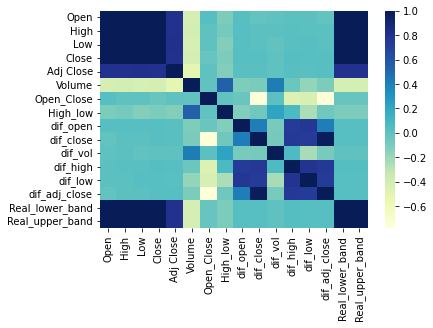

In [27]:
dataplot = sns.heatmap(data_IBM.corr(), cmap="YlGnBu",)

### **Mutual information gain**

In [28]:
X=data_IBM.drop(columns= ['Close','Adj Close','Date'])
y=data_IBM['Close']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:

from sklearn.feature_selection import mutual_info_regression, SelectKBest
mi = mutual_info_regression(X_train,y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False,inplace=True)
mi

Real_upper_band    6.664744
Real_lower_band    6.664299
Low                3.501559
High               3.500073
Open               2.918657
EMA                1.313104
SMA                1.226834
OBV                1.047916
ADX                0.238855
Volume             0.215516
RSI                0.117741
High_low           0.052816
dif_open           0.032080
dif_close          0.026216
Open_Close         0.019703
dif_low            0.012329
dif_adj_close      0.012308
dif_vol            0.007497
dif_high           0.000000
dtype: float64


Selecting features with contributions greater than 1.2. Dropping other features

Real_upper_band    
Real_lower_band    
Low                
High               
Open               
EMA                
SMA                
OBV                

### **LSTM**

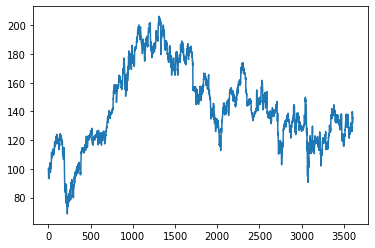

In [30]:
data_IBM['Close'].plot()

### **Creating the dataset for LSTM**

In [31]:
def custom_ts_multi_data_prep(data_IBM, target,window, horizon,start,end):
     X = []
     y = []
     start = start + int(window)
     if end is None:
         end = len(data_IBM) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(data_IBM[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y)



In [32]:
 from sklearn.preprocessing import LabelEncoder,MinMaxScaler
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

In [33]:
X_data=X_scaler.fit_transform(data_IBM[['Real_upper_band','Real_lower_band','Low','High','Open','EMA','SMA','OBV']])
Y_data=Y_scaler.fit_transform(data_IBM[['Close']])

In [34]:
hist_window = 60
horizon = 1
TRAIN_SPLIT=int(0.8*len(data_IBM))
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data,hist_window, horizon,0, TRAIN_SPLIT )
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data,hist_window, horizon,TRAIN_SPLIT,None) 

In [35]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_vali=np.asarray(x_vali).astype(np.float32)
y_vali=np.asarray(y_vali).astype(np.float32)


In [36]:
x_train.shape

(2825, 60, 8)

In [37]:
y_train.shape

(2825, 1, 1)

In [38]:
x_vali.shape

(661, 60, 8)

In [39]:
y_vali.shape

(661, 1, 1)

In [40]:

type(x_train)

numpy.ndarray

In [41]:
from tensorflow import keras
import tensorflow as tf

In [42]:
train_x=tf.convert_to_tensor(x_train)
train_y=tf.convert_to_tensor(y_train)
vali_x=tf.convert_to_tensor(x_vali)
vali_y=tf.convert_to_tensor(y_vali)

### **Building the Model**

In [43]:

# Build model. Include 20% drop out to minimize overfitting
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[-2:]))))

In [44]:
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=60,activation='tanh',return_sequences=True))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(units=80,activation='tanh',return_sequences=True))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.LSTM(units=100,activation='tanh'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
# Define optimizer and metric for loss function
model.compile(optimizer='adam',loss='mean_squared_error')


history =model.fit(train_x,train_y,epochs=10,batch_size=64,verbose=1)
# Run model


Epoch 1/10
45/45 [==============================] - 39s 339ms/step - loss: 0.0270
Epoch 2/10
45/45 [==============================] - 11s 241ms/step - loss: 0.0093
Epoch 3/10
45/45 [==============================] - 11s 246ms/step - loss: 0.0075
Epoch 4/10
45/45 [==============================] - 12s 260ms/step - loss: 0.0074
Epoch 5/10
45/45 [==============================] - 12s 264ms/step - loss: 0.0061
Epoch 6/10
45/45 [==============================] - 12s 258ms/step - loss: 0.0058
Epoch 7/10
45/45 [==============================] - 12s 258ms/step - loss: 0.0061
Epoch 8/10
45/45 [==============================] - 12s 263ms/step - loss: 0.0061
Epoch 9/10
45/45 [==============================] - 13s 281ms/step - loss: 0.0060
Epoch 10/10
45/45 [==============================] - 13s 291ms/step - loss: 0.0052


In [45]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 100)          23600     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            38640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                        

In [46]:

vali_predict=model.predict(vali_x,batch_size=64)
#val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred_Inverse = Y_scaler.inverse_transform(vali_predict)

In [47]:
vali_y.shape
x = np.array(vali_y).reshape(vali_y.shape[0],1)

In [48]:
x.shape

(661, 1)

In [49]:
x_inverse = Y_scaler.inverse_transform(x)

In [50]:
vali_x.shape

TensorShape([661, 60, 8])

In [51]:
pred_Inverse.shape

(661, 1)

In [52]:
y_train_inv=np.array(y_train).reshape(y_train.shape[0],1)
y_train_inv = Y_scaler.inverse_transform(y_train_inv)

## Calculation of *errors* 

In [53]:
import math
from sklearn import metrics
math.sqrt(metrics.mean_squared_error(pred_Inverse,x))

124.99032775079039

In [54]:
meanpercenterr=tf.keras.losses.MeanAbsolutePercentageError()
meanpercenterr(x_inverse, pred_Inverse).numpy()

3.0966654

In [55]:
data_IBM

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
0,2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585075,7875229,39.0469,65.6571,18.2872,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127308,90.258124,110.315485
1,2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299870,11542192,38.0455,65.1649,20.0685,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285206,87.014342,106.350862
2,2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645222,13232318,31.2910,64.3664,22.0469,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654648,86.085084,105.215102
3,2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491108,83.968451,102.628107
4,2008-01-09,93.460800,94.789673,92.887192,93.986618,59.590527,11424517,27.7145,62.9005,26.3078,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436413,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
3603,2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
3604,2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997
3605,2022-04-28,136.850006,136.990005,134.809998,135.740005,134.113144,4474300,60.4669,133.3245,24.2323,...,1.110001,2.180008,1.070007,0.680008,105200.0,-0.129990,0.179993,0.671860,122.166005,149.314006


In [56]:
data_IBM['year'] = pd.DatetimeIndex(data_IBM['Date']).year

In [57]:
df1 = pd.DataFrame(data_IBM['year'],
               columns =['year'])

In [58]:
df1=df1[0:len(y_train_inv)]
df1['true']=y_train_inv;


In [59]:
df1

,year,true
0,2008,109.760994
1,2008,110.917786
2,2008,110.669212
3,2008,111.195030
4,2008,111.156792
...,...,...
2820,2019,129.206497
2821,2019,129.015289
2822,2019,130.382416
2823,2019,131.051620


### **Plotting the prediction**

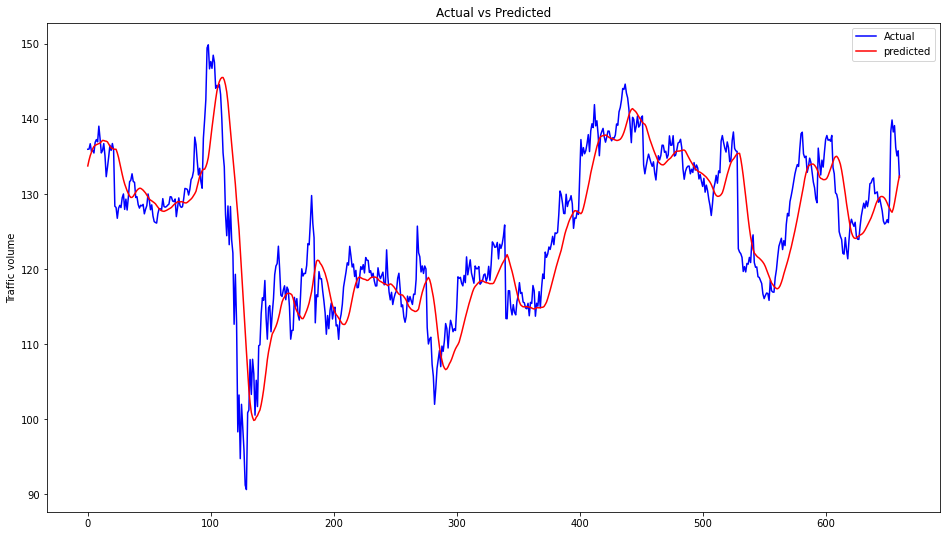

In [60]:
 plt.figure(figsize=(16,9))
 plt.plot(x_inverse,'b')
 plt.plot(pred_Inverse,'r')
 plt.title("Actual vs Predicted")
 plt.ylabel("Traffic volume")
 plt.legend(('Actual','predicted'))
 plt.show() 


In [61]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
len(x_inverse), len(pred_Inverse)

(661, 661)

In [63]:
x_inverse.reshape(661,)

array([135.94646 , 135.96558 , 136.6826  , 135.64053 , 135.82217 ,
       135.44933 , 136.86424 , 137.23709 , 136.94072 , 139.02486 ,
       137.34225 , 135.4589  , 135.77438 , 136.70172 , 135.06693 ,
       132.29445 , 133.52773 , 134.92352 , 136.48184 , 135.7935  ,
       136.71129 , 135.86043 , 128.35564 , 128.19312 , 126.74952 ,
       128.06883 , 128.47037 , 128.174   , 129.48375 , 129.99043 ,
       127.93499 , 129.30211 , 127.848946, 129.5698  , 131.61568 ,
       131.826   , 132.67686 , 131.6348  , 131.55832 , 129.51242 ,
       129.62715 , 128.56596 , 128.10707 , 128.48949 , 128.40344 ,
       128.6042  , 127.34225 , 127.95411 , 128.43213 , 129.99043 ,
       129.14914 , 127.88719 , 128.5373  , 127.06501 , 126.30975 ,
       126.18546 , 126.108986, 127.36137 , 128.0306  , 128.02103 ,
       127.877625, 129.36902 , 128.30785 , 128.23135 , 128.3174  ,
       128.49904 , 128.64244 , 129.62715 , 129.58891 , 129.04398 ,
       128.97705 , 129.32123 , 126.969406, 128.14531 , 129.464

In [113]:
ind = np.linspace(1,661, 661)

In [112]:
df = pd.DataFrame(list(zip(ind, x_inverse.reshape(661,), pred_Inverse.reshape(661,))),
               columns =['ind','true', 'predicted'])
df

,ind,true,predicted
0,1.0,135.946457,133.724045
1,2.0,135.965576,134.486542
2,3.0,136.682602,135.094894
3,4.0,135.640533,135.566422
4,5.0,135.822174,136.010834
...,...,...,...
656,657.0,139.099991,128.802414
657,658.0,136.190002,129.694992
658,659.0,135.059998,130.656525
659,660.0,135.740005,131.595718


In [66]:
import plotly.express as px

fig = px.line(df, x="ind", y=["true", 'predicted'])
fig.show()

In [67]:
hist_window = 60
horizon = 15
TRAIN_SPLIT=int(0.8*len(data_IBM))
x_train_for, y_train_for = custom_ts_multi_data_prep(X_data, Y_data,hist_window, horizon,0, TRAIN_SPLIT )
x_vali_for, y_vali_for = custom_ts_multi_data_prep(X_data, Y_data,hist_window, horizon,TRAIN_SPLIT,None) 

x_train_for=np.asarray(x_train_for).astype(np.float32)
y_train_for=np.asarray(y_train_for).astype(np.float32)
x_vali_for=np.asarray(x_vali_for).astype(np.float32)
y_vali_for=np.asarray(y_vali_for).astype(np.float32)


train_x_for=tf.convert_to_tensor(x_train_for)
train_y_for=tf.convert_to_tensor(y_train_for)
vali_x_for=tf.convert_to_tensor(x_vali_for)
vali_y_for=tf.convert_to_tensor(y_vali_for)

In [76]:

# Build model. Include 20% drop out to minimize overfitting
model_for = keras.Sequential()
model_for.add(keras.layers.Bidirectional(keras.layers.LSTM(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[-2:]))))

In [77]:
model_for.add(keras.layers.Dropout(0.2))
model_for.add(keras.layers.LSTM(units=60,activation='tanh',return_sequences=True))
model_for.add(keras.layers.Dropout(0.3))
model_for.add(keras.layers.LSTM(units=80,activation='tanh',return_sequences=True))
model_for.add(keras.layers.Dropout(0.4))
model_for.add(keras.layers.LSTM(units=100,activation='tanh'))
model_for.add(keras.layers.Dropout(0.5))
model_for.add(keras.layers.Dense(15))
# Define optimizer and metric for loss function
model_for.compile(optimizer='adam',loss='mean_squared_error')


history_for =model_for.fit(train_x,train_y,epochs=10,batch_size=64,verbose=1)
# Run model

Epoch 1/10
45/45 [==============================] - 27s 254ms/step - loss: 0.0798
Epoch 2/10
45/45 [==============================] - 12s 258ms/step - loss: 0.0262
Epoch 3/10
45/45 [==============================] - 11s 252ms/step - loss: 0.0187
Epoch 4/10
45/45 [==============================] - 12s 260ms/step - loss: 0.0148
Epoch 5/10
45/45 [==============================] - 11s 253ms/step - loss: 0.0126
Epoch 6/10
45/45 [==============================] - 12s 274ms/step - loss: 0.0111
Epoch 7/10
45/45 [==============================] - 13s 299ms/step - loss: 0.0102
Epoch 8/10
45/45 [==============================] - 11s 250ms/step - loss: 0.0092
Epoch 9/10
45/45 [==============================] - 12s 259ms/step - loss: 0.0090
Epoch 10/10
45/45 [==============================] - 12s 262ms/step - loss: 0.0075


In [78]:
x_input=X_data[-hist_window:,]

In [79]:
x_input=x_input.reshape((1,x_input.shape[0],x_input.shape[1]))

In [80]:
yhat=model_for.predict(x_input,verbose=0)

In [81]:
yhat= Y_scaler.inverse_transform(yhat)

In [82]:
yhat

array([[131.84346, 130.89975, 130.96356, 130.56857, 133.27649, 131.34016,
        131.50923, 132.04951, 130.4011 , 131.93999, 130.5119 , 131.58519,
        131.20006, 131.4722 , 131.57494]], dtype=float32)

In [91]:
np.linspace(661, 675, 15)

array([661., 662., 663., 664., 665., 666., 667., 668., 669., 670., 671.,
       672., 673., 674., 675.])

In [122]:
df1 = pd.DataFrame(list(zip(np.linspace(661, 675, 15), yhat[0])),
               columns =['ind','forecast'])

In [128]:
df2 = pd.merge(df, df1, on = 'ind', how = 'outer')

In [131]:
import plotly.express as px

fig = px.line(df2, x="ind", y=["true", 'predicted', 'forecast'])
fig.show()

,ind,true,predicted
0,1.0,135.946457,133.724045
1,2.0,135.965576,134.486542
2,3.0,136.682602,135.094894
3,4.0,135.640533,135.566422
4,5.0,135.822174,136.010834
...,...,...,...
656,657.0,139.099991,128.802414
657,658.0,136.190002,129.694992
658,659.0,135.059998,130.656525
659,660.0,135.740005,131.595718
